In [1]:
import requests
from IPython.display import Markdown

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.ndimage import measurements as measure

**Warning!** This is a soultion. If you are looking to do these 
           [Agile Geosciences](https://agilescientific.com/blog/2020/4/16/geoscientist-challenge-thyself) 
           challenges on your own then please visit this
           [Jupyter Notebook](https://colab.research.google.com/drive/1eP68NTV-GA3R-BYUh-CUxcgYDQ5IuetS)
           to get started.


## Functions for URL requests
First a few functions to use along the way...

In [2]:
def get_data(url, key):
    params = {'key':my_key}
    r = requests.get(url, params)
    return r.text

def get_question(url):
    r = requests.get(url)
    return r.text

def check_answer(questionNum,answer):
    params = {'key':my_key,
              'question':questionNum,
              'answer':answer
             }
    result = requests.get(url, params)
    return Markdown(result.text)

## Request Challenge Description

In [3]:
url = 'https://kata.geosci.ai/challenge/prospecting' 
r = get_question(url)

Markdown(r)

# Prospecting

We have 5 arrays of 4096 elements each. Each array represents a map as a 'raster' with 64 &times; 64 = 4096 pixels, and is given as a row in the dataset. Each pixel is represented by a single integer, taking values from 0 to 8.

The maps represent different things. In order, they are:

1. Reliability of well data.
2. Reliability of seismic data.
3. Porosity from wells and conceptual models.
4. Fracture density from wells and seismic.
5. Our land position (1 denotes 'our land').

We need to answer the following questions:

1. How many pixels have zero total reliability?
2. How many pixels are predicted to have better than 50th percentile (P50) porosity and better than P50 fracture density?
3. How many of these pixels have non-zero reliability and are on our land? These blobs are our _prospects_.
4. Find the product of the (x, y) coordinates of the cell containing the centre of mass of the largest _prospect_ blob.

For question 4, a centre of mass at (3.4, 12.6) is in the cell (3, 12) and you would respond with 3 &times; 12 = **36**.

We'll consider blobs to be connected if they have directly neighbouring pixels. In example A, below, there are 3 'blobs' of one pixel each. In example B there are 2 blobs, each with three pixels.

      A        B
    1 0 1    1 1 0
    0 1 0    1 0 1
    0 0 0    0 1 1


## Example

Here is a dataset of smaller maps. Every row represents a map, each 3 &times 3 pixels:

    example = """0,1,0,1,2,1,0,1,0
                 2,1,0,1,1,1,0,1,0
                 0,1,2,1,3,1,1,2,2
                 0,2,1,2,3,1,1,3,2
                 1,1,1,1,1,1,0,0,0"""

If we re-shaped each row to make a 3 &times; 3 map, the maps would look like:

      1       2       3       4       5    <--- map number
    0 1 0   2 1 0   0 1 2   0 2 1   1 1 1
    1 2 1   1 1 1   1 3 1   2 3 1   1 1 1
    0 1 0   0 1 0   1 2 2   1 3 2   0 0 0   

Here's how we might answer the questions:

1. There are **3** pixels with zeros in both of the reliability maps (the first two maps).
1. The P50 values on maps 3 and 4 are 1 and 2 respectively. There are **2** pixels that are higher on both maps.
1. Of those pixels, **1** has non-zero reliability and is on our land (map 5).
1. The coordinates of that pixels are (1, 1) so the product of those coordinates is **1**.


## Hints

It's likely that the `scipy.ndimage.measurements` module will be useful in answering question 4. For example, if you have an array `arr` like:

    0 1 1
    0 0 0
    1 0 0

Then `scipy.ndimage.measurements.label()` will return two things: the labels and the number 2 (meaning it found 2 objects). The labels have the same shape as the original 'map':

    0 1 1   <--- 1 denotes 'object 1'
    0 0 0   <--- 0 denotes 'background', i.e. no objects
    2 0 0   <--- 2 denotes 'object 2'

Once you have labels, you can get the centre of mass of the object labelled `3` with `scipy.ndimage.measurements.center_of_mass(arr, labels, 3)`.

We will use the default behaviour of the `scipy.ndimage.measurements.label()` function to decide if things are separate objects.


## A quick reminder how this works

You can retrieve your data by choosing any Python string as a **`<KEY>`** and substituting here:
    
    https://kata.geosci.ai/challenge/prospecting?key=<KEY>
                                                     ^^^^^
                                                     use your own string here

To answer question 1, make a request like:

    https://kata.geosci.ai/challenge/prospecting?key=<KEY>&question=1&answer=1234
                                                     ^^^^^          ^        ^^^^
                                                     your key       Q        your answer

[Complete instructions at kata.geosci.ai](https://kata.geosci.ai/challenge)

----

© 2020 Agile Scientific, licensed CC-BY

## My solution

Let's enter a seed phrase and get the data.

In [4]:
my_key = 'armstrys'

## Input
r = get_data(url, my_key)

r[:400]

'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'

## Making the text meaningful
Let's take a look at the maps. We make a list of the map values by splitting our text by `\n` and then by `,`. Each line gets resized to a 64x64 np.array and appended to the list. We'll also generate a list of titles so we can keep track of the maps using the list indices. Let's display the first map to see how it looks.

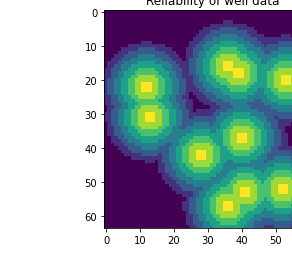

In [5]:
maps = []
for l in r.split('\n'):
        maps.append(np.resize(np.fromstring(l,sep=','),(64,64)))
maps = np.array(maps)

plt.imshow(maps[0,:,:])
plt.title('Reliability of well data')
plt.colorbar()
plt.show()


## Question 1
To find the pixels with zero total reliability we need to combine the first two maps we were provided. Any pixels that are zero in both the well and seismic reliability maps will be labeled as unreliable.

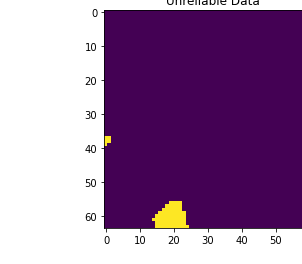

There are **85** pixels with zero reliability.


In [6]:
def zeroReliable(maps):
    '''
    Use our maps to generate a new map that has a True label for any pixel that
    has zero reliability in both of our well and seismic reliability maps (these
    are the first two maps in the array).
    '''

    ## define reliability maps
    rmaps = maps[:2,:,:]

    ## combine maps and check if equal to 0
    rmap_comb = np.sum(rmaps, axis=0) == 0

    ## Plot new map - True is unrealiable here
    plt.imshow(rmap_comb)
    plt.title('Unreliable Data')
    plt.colorbar()
    plt.show()

    return rmap_comb

zrmap = zeroReliable(maps)
answer1 = int(np.sum(zrmap==1))

Markdown(f'There are **{answer1}** pixels with zero reliability.\n')


In [7]:
## Check
questionNum = 1
check_answer(questionNum,answer1)

Correct

## Question 2
Now that we know where we can trust our data, we can move on to the subsurface properties. The code block below combines a >P50 porosity map and a >P50 fracture density map to high-grade the best areas on our map. Try playing with the sliders to see how things change if you favor porosity over fracture density and vice versa.

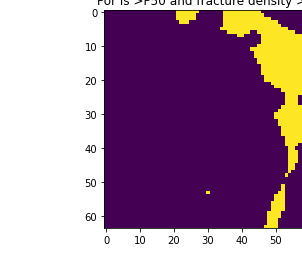

There are **595** pixels with porosity >P50and fracture density >P50!

In [8]:
def abovePXX(maps,porThresh,fracThresh):
    '''
    Take porosity and fracture density maps to generate a map of combined over
    a threshold for each
    '''
    pmaps = maps[2:4,:,:]
    pmaps[0,:,:] = pmaps[0,:,:] > np.percentile(pmaps[0,:,:],porThresh)
    pmaps[1,:,:] = pmaps[1,:,:] > np.percentile(pmaps[1,:,:],fracThresh)
    pmaps_comb = np.prod(pmaps, axis=0)
    count = np.sum(pmaps_comb==1)

    plt.imshow(pmaps_comb)
    plt.title(f'Por is >P{porThresh} and fracture density >P{fracThresh}')
    plt.colorbar()
    plt.show()

    return pmaps_comb

porThresh = 50
fracThresh = 50

aXXmap = abovePXX(maps, porThresh, fracThresh)
answer2 = int(np.sum(aXXmap==1))

Markdown(f'''There are **{answer2}** pixels with porosity >P{porThresh}and fracture density >P{fracThresh}!''')

In [9]:

## Check
questionNum = 2
check_answer(questionNum,answer2)

Correct

## Question 3
Finally, let's stack the subsurface properties with our reliability and land maps to see which areas stand out.

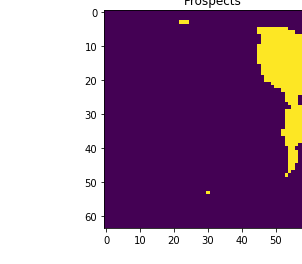

There are **423** prospective pixels on this map using the cut-offs assigned above.

In [10]:
pmap = maps[-1,:,:] * ~zrmap * aXXmap

plt.imshow(pmap)
plt.title('Prospects')
plt.colorbar()
plt.show()

answer3 = int(np.sum(pmap==1))

Markdown(f'''There are **{answer3}** prospective pixels on this map using the cut-offs assigned above.''')



In [11]:
## Check
questionNum = 3
check_answer(questionNum,answer3)

Correct

## Question 4
X marks the spot! Let's calculate the center of mass of the largest 'prospect' or continuous blob of pixels.

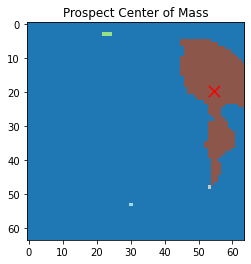

The product of largest prospect coordinates is **1026**.

In [12]:
    def com(pmap):
        '''
        Find the center of mass of the largest blob on our binary map.
        Return the coordinates of this point.
        '''
        ## find discrete blobs of pixels and label
        label, numFeat = measure.label(pmap)
        counts = np.bincount(label.ravel())
        label_big = np.argmax(counts[1:])+1

        ## get the center of mass using the label of the largest prospect
        lat, lon = measure.center_of_mass(input=pmap, labels=label, index=label_big)

        ## plot the prospect labels and an x on the center of mass for the largest
        plt.imshow(label, cmap='tab20')
        plt.title('Prospect Center of Mass')
        plt.scatter(lon, lat, s=125, c='red', marker='x')        
        plt.show()

        return lat, lon

    lat, lon = com(pmap)
    answer4 = int(np.floor(lat) * np.floor(lon))

Markdown(f'The product of largest prospect coordinates is **{answer4}**.')


In [13]:
## Check
questionNum = 4
check_answer(questionNum,answer4)

Correct! The next challenge is: https://kata.geosci.ai/challenge/birthquakes - good luck!